# **Airline Passenger Satisfaction**

**Problem Statement** :- The current problem at hand is the declining level of airline passenger satisfaction, which poses a significant challenge to the airline industry. Despite advancements in technology, improved in-flight services, and enhanced safety measures, there is a growing dissatisfaction among passengers that needs to be addressed urgently. The lack of satisfaction not only affects the reputation of individual airlines but also hampers the industry as a whole, leading to decreased customer loyalty, negative word-of-mouth, and potential financial losses.

Solving airline passenger satisfaction can bring several benefits to an airline company. Here are some ways in which improving passenger satisfaction can benefit an airline:

1. Customer Loyalty: Satisfied passengers are more likely to become repeat customers and develop loyalty towards the airline. They are more inclined to choose the same airline for future travel needs, resulting in increased customer retention and reduced customer churn.

2. Positive Word-of-Mouth: Satisfied passengers are more likely to share their positive experiences with others, both through personal recommendations and online reviews. This positive word-of-mouth can attract new customers to the airline and contribute to its reputation and brand image.

3. Competitive Advantage: In today's highly competitive airline industry, providing exceptional customer service and satisfaction can set an airline apart from its competitors. By focusing on passenger satisfaction, an airline can differentiate itself and gain a competitive edge, attracting more customers and potentially capturing a larger market share.

4. Increased Revenue: Satisfied passengers are more likely to spend more on additional services and upgrades, such as premium seating, in-flight entertainment, Wi-Fi, and other ancillary services. This can lead to increased revenue per passenger and contribute to the overall financial performance of the airline.

5. Cost Savings: Addressing passenger satisfaction issues can also result in cost savings for an airline. For example, by resolving common complaints or issues, such as delays, lost baggage, or poor customer service, an airline can reduce compensation claims, refunds, and operational inefficiencies, resulting in lower costs.


**About the Data**

**•** Dataset Link :- https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

**Importing important dependencies and data**

In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score

In [113]:
df = pd.read_csv(r"C:\Users\KIRPAL SINGH\Downloads\archive(1)\train.csv")

In [114]:
df.head()        # first 5 rows of the dataset

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


**Extrapolatory Data Analysis**

In [115]:
df.shape    #shape of the dataset

(103904, 25)

In [116]:
df.describe()
"""Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
"""

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [117]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [118]:
df.dtypes   #the datatypes in the dataset

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

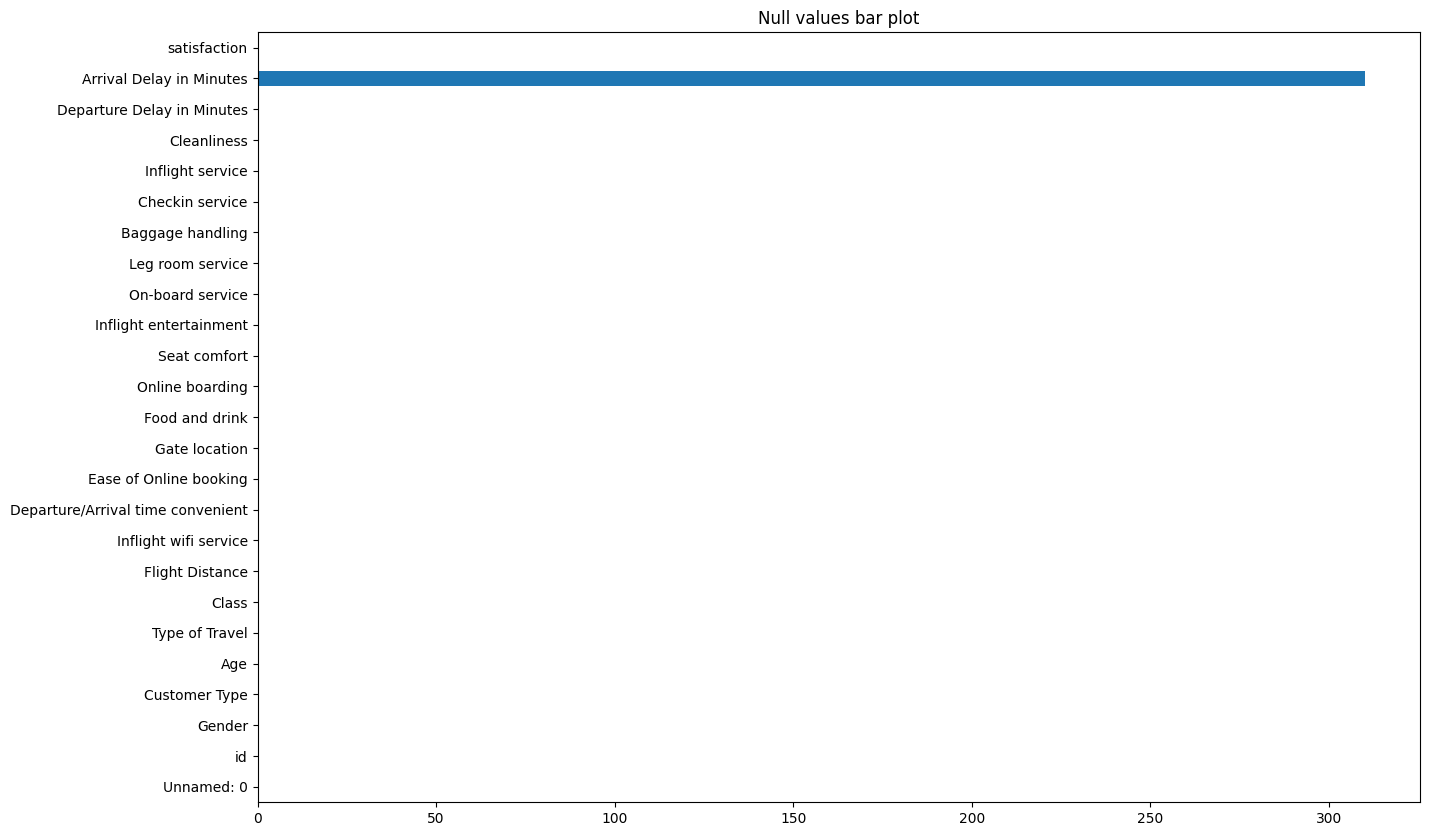

In [119]:
plt.figure(figsize=(15,10))    # plotting the null values in the dataset
df.isnull().sum().plot(kind="barh")
plt.title("Null values bar plot")
plt.show()

In [120]:
df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna(value=df["Arrival Delay in Minutes"].median())
# filling the null values in the arrival delay in minutes features with the median of the feature

In [121]:
df.isnull().sum()   # checking if more null values present in the dataset

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [122]:
df = df.drop(["id", "Unnamed: 0"], axis = 1)  
''' dropping the id and unnamed features as they do not add to the prediction of the target feature'''

In [124]:
gender_encoding = {"Male" : 0,
            "Female" : 1}
cut_encoding = {"Loyal Customer" : 0,
                "disloyal Customer" : 1}
travel_encoding = {"Personal Travel" : 0,
                   "Business travel" : 1}
class_encoding = {"Eco Plus" : 0,
                  "Business" : 1,
                  "Eco" : 2}

'''encoding the categorical numerical in the dataset into 0 and 1 categories'''

In [125]:
df["Gender"] = df["Gender"].map(gender_encoding)
df["Customer Type"] = df["Customer Type"].map(cut_encoding)
df["Type of Travel"] = df["Type of Travel"].map(travel_encoding)
df["Class"] = df["Class"].map(class_encoding)

'''applying the encodings to the features using the map function'''

In [126]:
label_encoder = LabelEncoder()  # encoding the target feature using label encoder
df["satisfaction"] = label_encoder.fit_transform(df["satisfaction"])

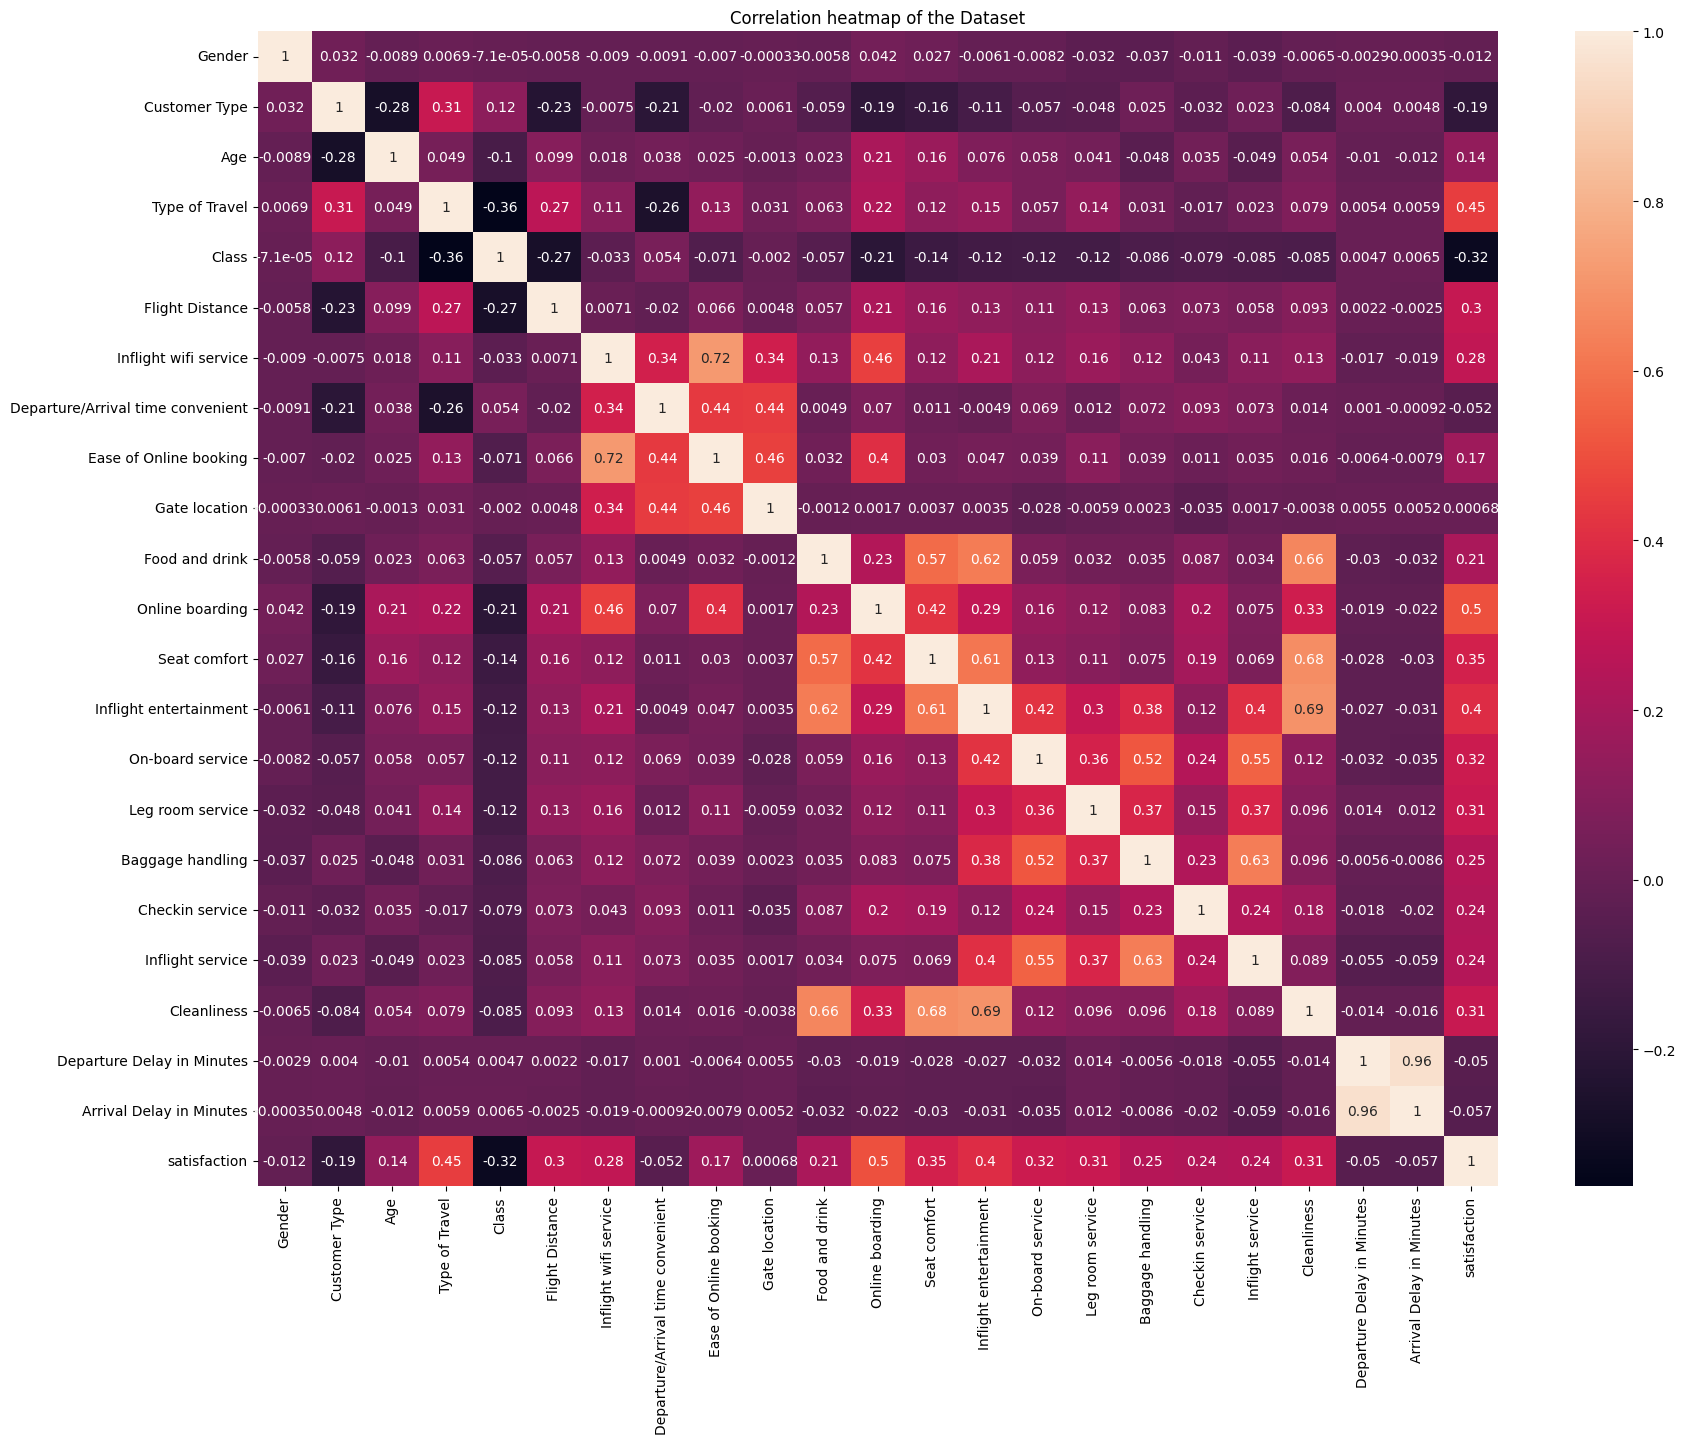

In [128]:
plt.figure(figsize=(20,15))  
plt.title("Correlation heatmap of the Dataset")
sns.heatmap(df.corr(), annot=True)
plt.show()

In [129]:
num_cols = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]

object_cols = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness',"Gender", "Customer Type", "Type of Travel", "Class", "satisfaction"]

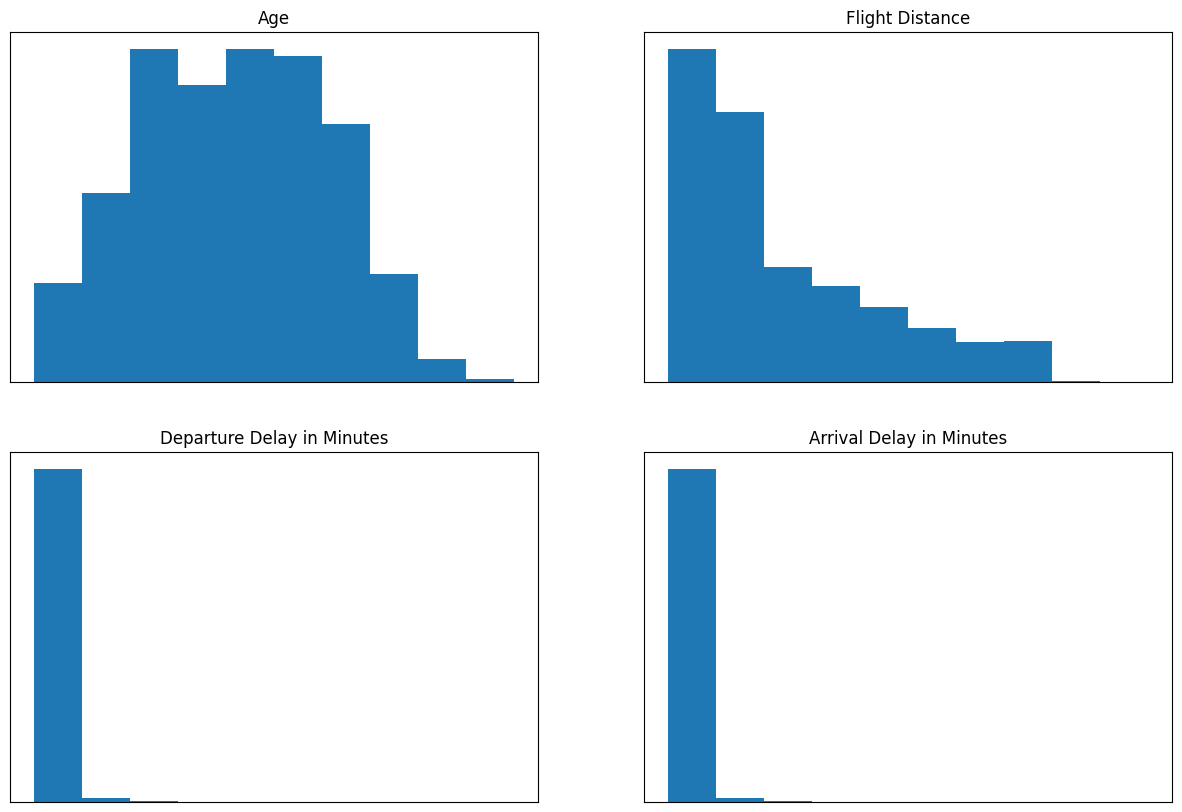

In [130]:
plt.figure(figsize=(15,10))
for idx, col in enumerate(num_cols):
    plt.subplot(2, 2, idx+1)
    plt.hist(x=df[col], bins=10)
    plt.xticks([])
    plt.yticks([])
    plt.title(col)
plt.show()

#plotting the distributions of the numerical variables in the dataset

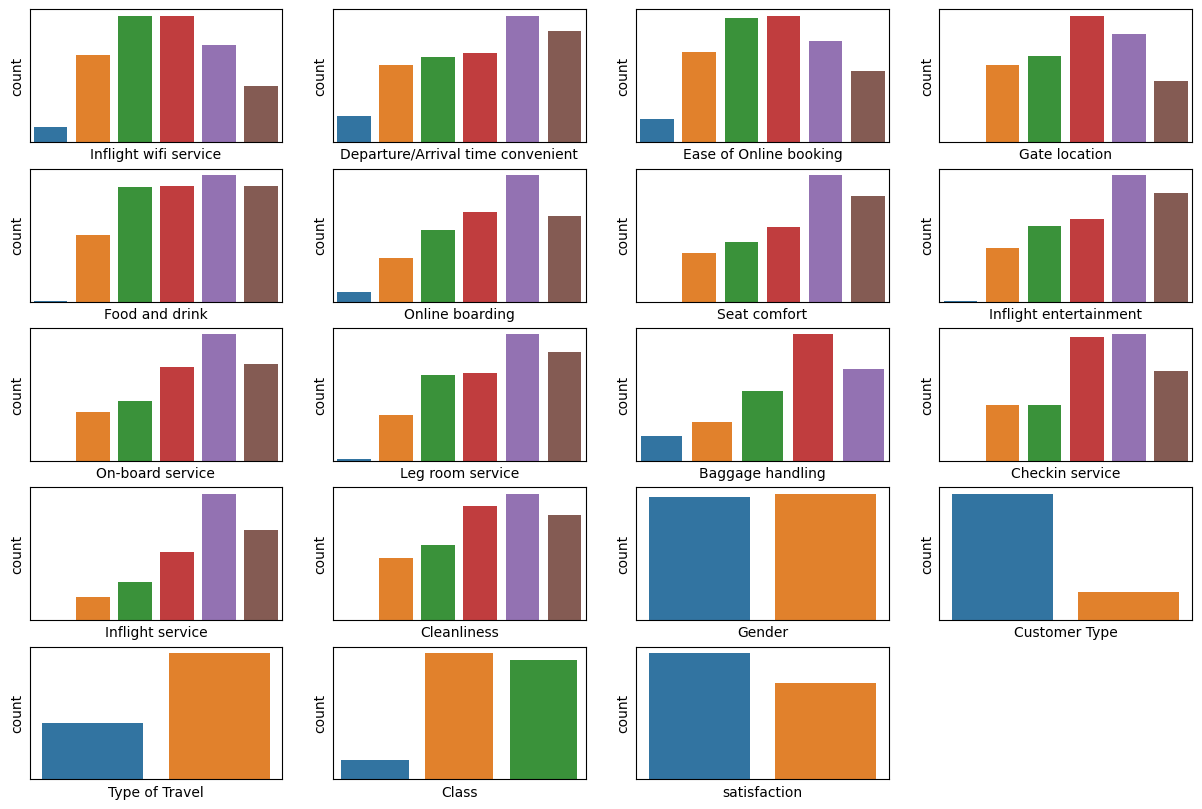

In [131]:
plt.figure(figsize=(15,10))
for idx, col in enumerate(object_cols):
    plt.subplot(5, 4, idx+1)
    sns.countplot(x=col, data=df)
    plt.xticks([])
    plt.yticks([])
plt.show()
# plotting the distributions of the categorical variables of the dataset

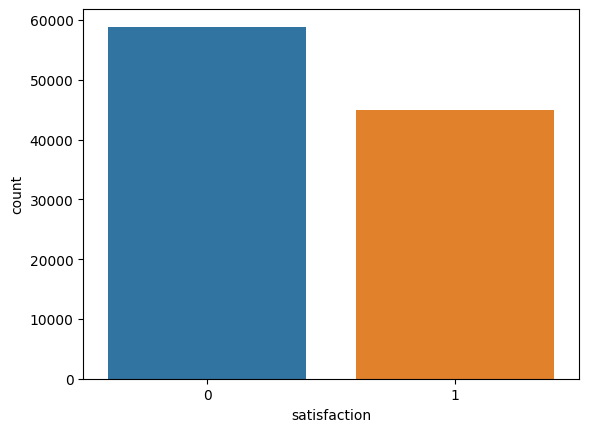

In [132]:
sns.countplot(x=df["satisfaction"], data = df)
plt.show()

We can infer from the above plot of the target variable that the datset is almost balanced and there is no need for an up or downsampling in the dataset

**Feature Engineering**

In [ ]:
for i in range(len(df["Departure Delay in Minutes"])):
    if df["Departure Delay in Minutes"][i]!=0:
        df["Departure Delay in Minutes"][i] = 1

In [142]:
df["Arrival Delay in Minutes"] = np.where(df["Arrival Delay in Minutes"]>0, 1, 0)

In the above two cells we are converting the column into categorical by converting the values in both the column that are not 0 as it will reduce two numerical features in the dataset and will reduce the computation.

In [145]:
df["Age"] = df["Age"]/df["Age"].mean()   # normalizing the features of the dataset
df["Flight Distance"] = df["Flight Distance"]/df["Flight Distance"].mean()

**Splitting the Data**

In [149]:
x = df.drop(["satisfaction"], axis=1)  # splitting the dataset into independent and dependent features
y = df["satisfaction"]

In [150]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)  # splitting the dataset into train and test

**Model Building**

In [176]:
model = Sequential()

model.add(Dense(100, input_shape=(22,), activation="relu"))
model.add(Dense(2400, activation="relu"))
model.add(Dense(1600, activation="relu"))
model.add(Dense(800, activation="relu"))
model.add(Dense(2, activation="sigmoid"))

In [177]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               2300      
                                                                 
 dense_10 (Dense)            (None, 2400)              242400    
                                                                 
 dense_11 (Dense)            (None, 1600)              3841600   
                                                                 
 dense_12 (Dense)            (None, 800)               1280800   
                                                                 
 dense_13 (Dense)            (None, 2)                 1602      
                                                                 
Total params: 5,368,702
Trainable params: 5,368,702
Non-trainable params: 0
_________________________________________________________________


In [178]:
model.compile(optimizer=Adam(learning_rate=0.001), loss=SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [179]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=1)

2598/2598 [==============================] - 156s 60ms/step - loss: 0.2085 - accuracy: 0.9128 - val_loss: 0.1498 - val_accuracy: 0.9402


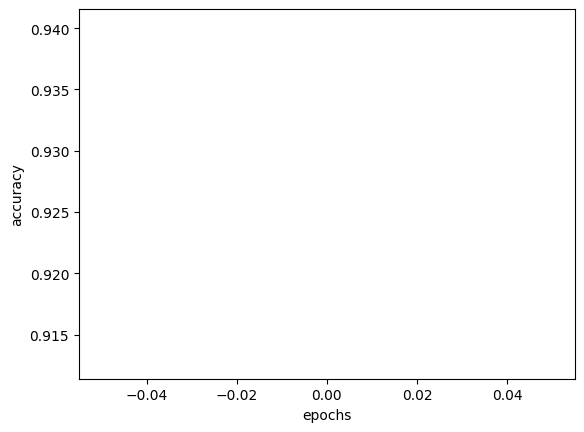

In [180]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

**Model Evaluation**

In [181]:
y_pred1 = model.predict(x_test)

650/650 [==============================] - 9s 14ms/step


In [182]:
y_pred1 = y_pred1.argmax(axis=1)

<Axes: >

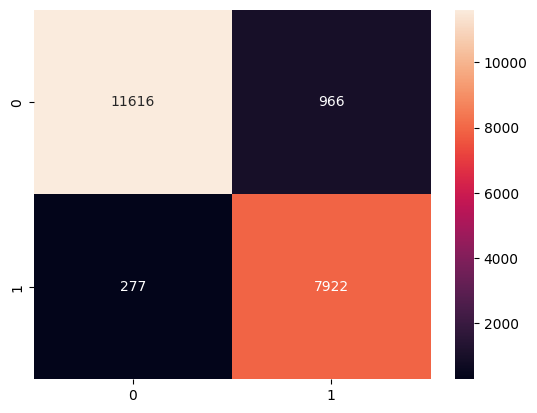

In [183]:
sns.heatmap(confusion_matrix(y_pred1, y_test), annot=True, fmt="g")

**Model 2**

In [162]:
model2 = Sequential()

model2.add(Dense(100, input_shape=(22,), activation="relu"))
model2.add(BatchNormalization())
model2.add(Dense(2000, activation="relu"))
model2.add(BatchNormalization())
model2.add(Dense(600, activation="relu"))
model2.add(BatchNormalization())
model2.add(Dense(2, activation="sigmoid"))

In [163]:
model2.compile(optimizer=Adam(learning_rate=0.001), loss=SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [164]:
history2 = model2.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=1)

2598/2598 [==============================] - 49s 18ms/step - loss: 0.2096 - accuracy: 0.9186 - val_loss: 0.1397 - val_accuracy: 0.9471


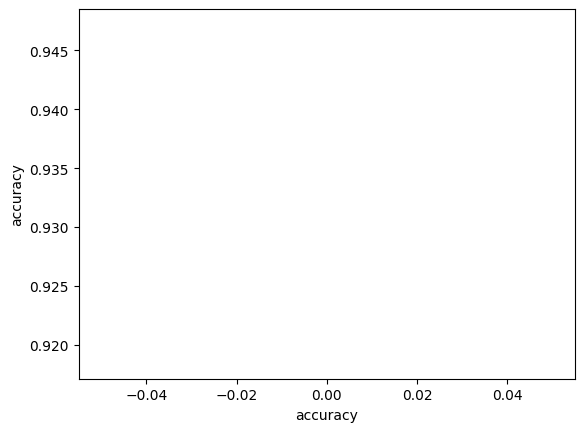

In [166]:
plt.plot(history2.history["accuracy"])
plt.plot(history2.history["val_accuracy"])
plt.xlabel("accuracy")
plt.ylabel("accuracy")
plt.show()

In [167]:
model.evaluate(x_test, y_test)

650/650 [==============================] - 10s 15ms/step - loss: 0.1573 - accuracy: 0.9329


[0.1572820246219635, 0.932871401309967]

**Model Evaluation**

In [168]:
y_pred = model2.predict(x_test)

650/650 [==============================] - 4s 6ms/step


In [171]:
y_pred = y_pred.argmax(axis=1)

In [172]:
print(f"the accuracy score of the model is {accuracy_score(y_pred, y_test)}")

the accuracy score of the model is 0.9470670323853521


<Axes: >

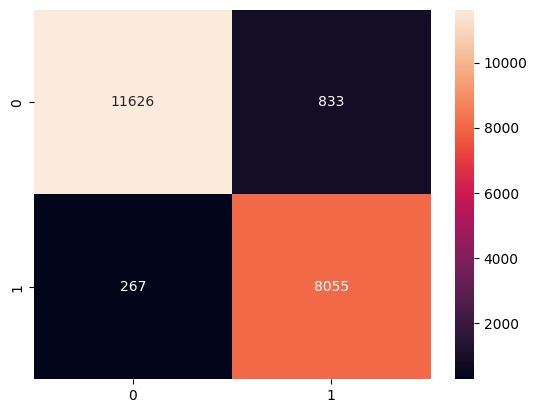

In [173]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="g")

**Strengths and limitations of the pipeline**

The proposed pipeline involves getting the data, checking for the null values,  

**Implications of the result and Data Driven Approach**

The above result will help the company to improve the passenger comfort. The result includes the confusion matrix which will help to take a quick and effective decision whether the facilities are improving the passenger experience or not.

And on the other side the data driven approach will be highly dependent on data and due to lack of data we cannot move forward to solve the problem. The data driven approach will also include use of machine learning and deep learning models that can handle large datasets and learn patterns from the data and provide best results.

**Informative Feature**

In [185]:
rf_clf = RandomForestClassifier()

In [186]:
rf_clf.fit(x, y)

RandomForestClassifier()

In [188]:
feature_importances = rf_clf.feature_importances_
features = x.columns

In [199]:
imp_df = pd.DataFrame({"imp": feature_importances, "cols" : features})

In [200]:
imp_df = imp_df.set_index("cols")

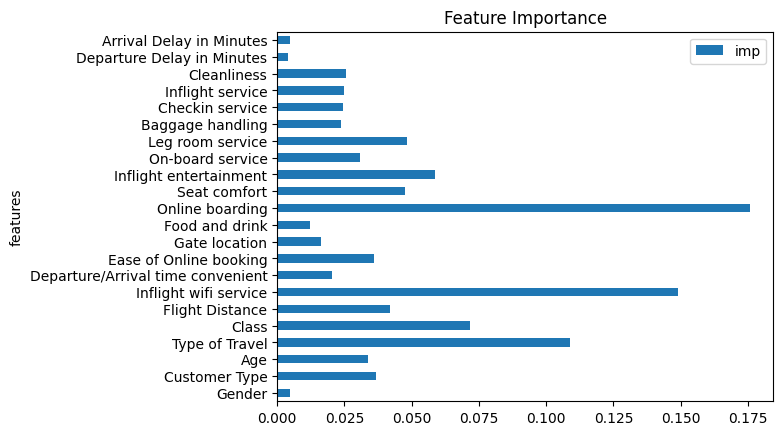

In [207]:
imp_df.plot(kind="barh")
plt.title("Feature Importance")
plt.ylabel("features")
plt.show()

From the above bar plot we can see that Online boarding, Inflight wifi service and Type of travel are the most informative feature from the dataset.